In [1]:
from os import walk
from pathlib import Path
import json

import numpy as np
import matplotlib.pyplot as plt

In [2]:
structures_path = Path("../tests/data/test_structure_data/")
structure_files = []
for prefix, _, suffixes in walk(structures_path):
    for suffix in suffixes:
        if suffix.endswith(".json"):
            structure_files.append(Path(prefix) / suffix)
structure_files

[PosixPath('../tests/data/test_structure_data/a.1.1.1/2gkm/gene/structure_0.json'),
 PosixPath('../tests/data/test_structure_data/a.1.1.1/1ux8/gene/structure_0.json'),
 PosixPath('../tests/data/test_structure_data/a.1.1.1/1ux8/gene/structure_1.json'),
 PosixPath('../tests/data/test_structure_data/a.1.1.1/2gl3/gene/structure_0.json'),
 PosixPath('../tests/data/test_structure_data/a.1.1.2/1idr/gene/structure_0.json'),
 PosixPath('../tests/data/test_structure_data/a.1.1.2/1idr/cds/structure_0.json')]

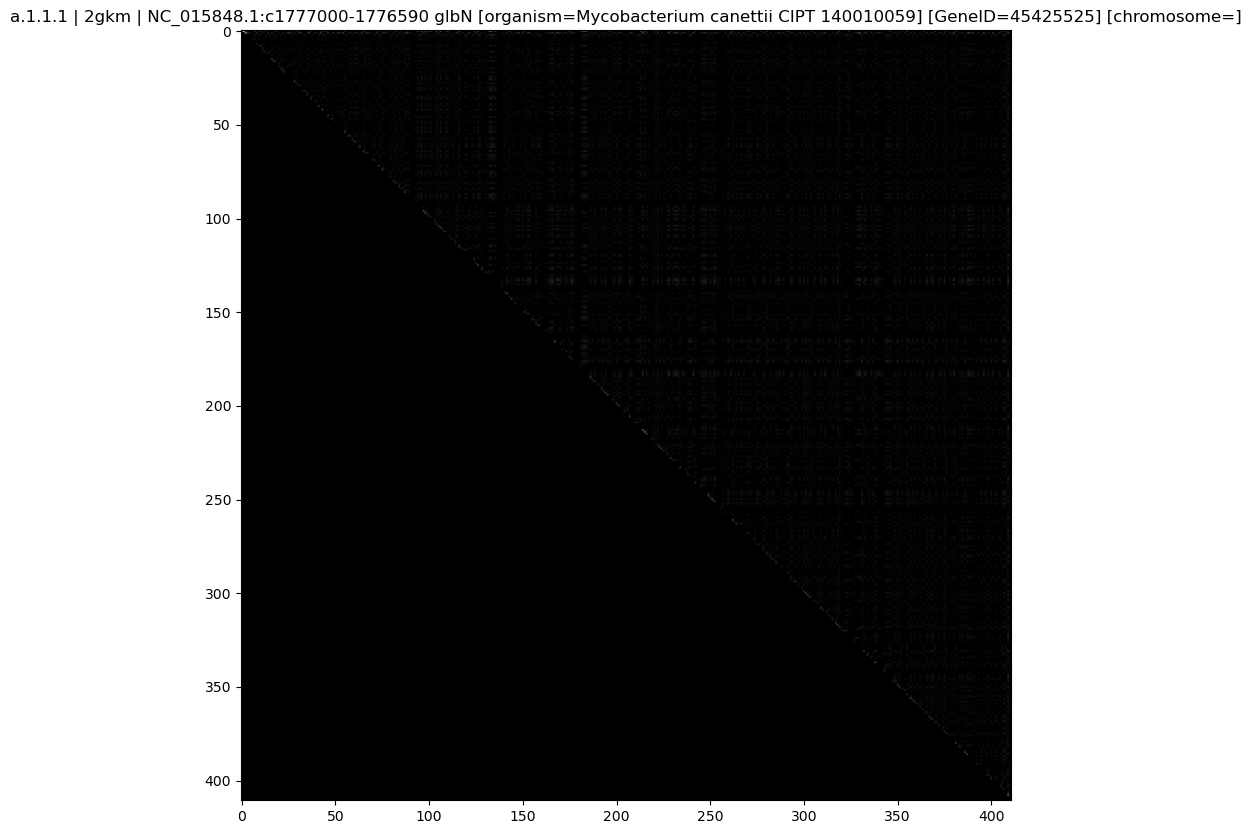

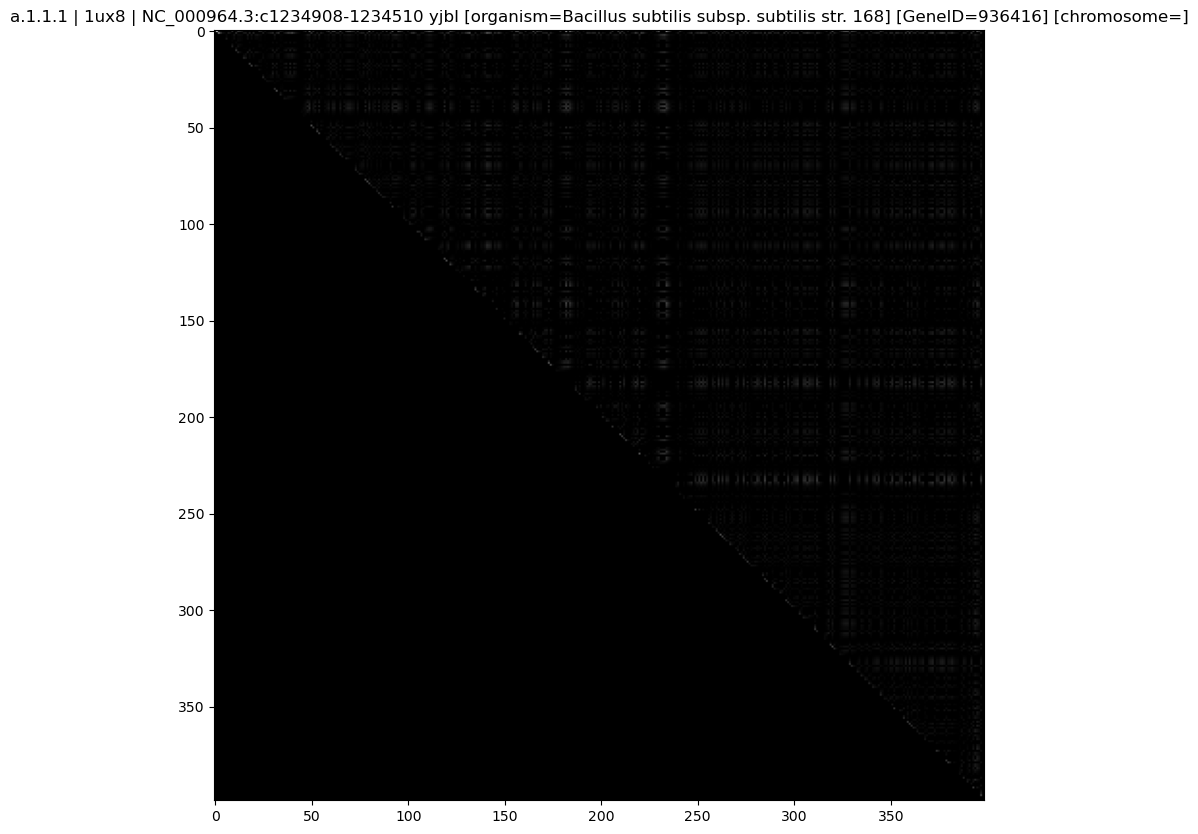

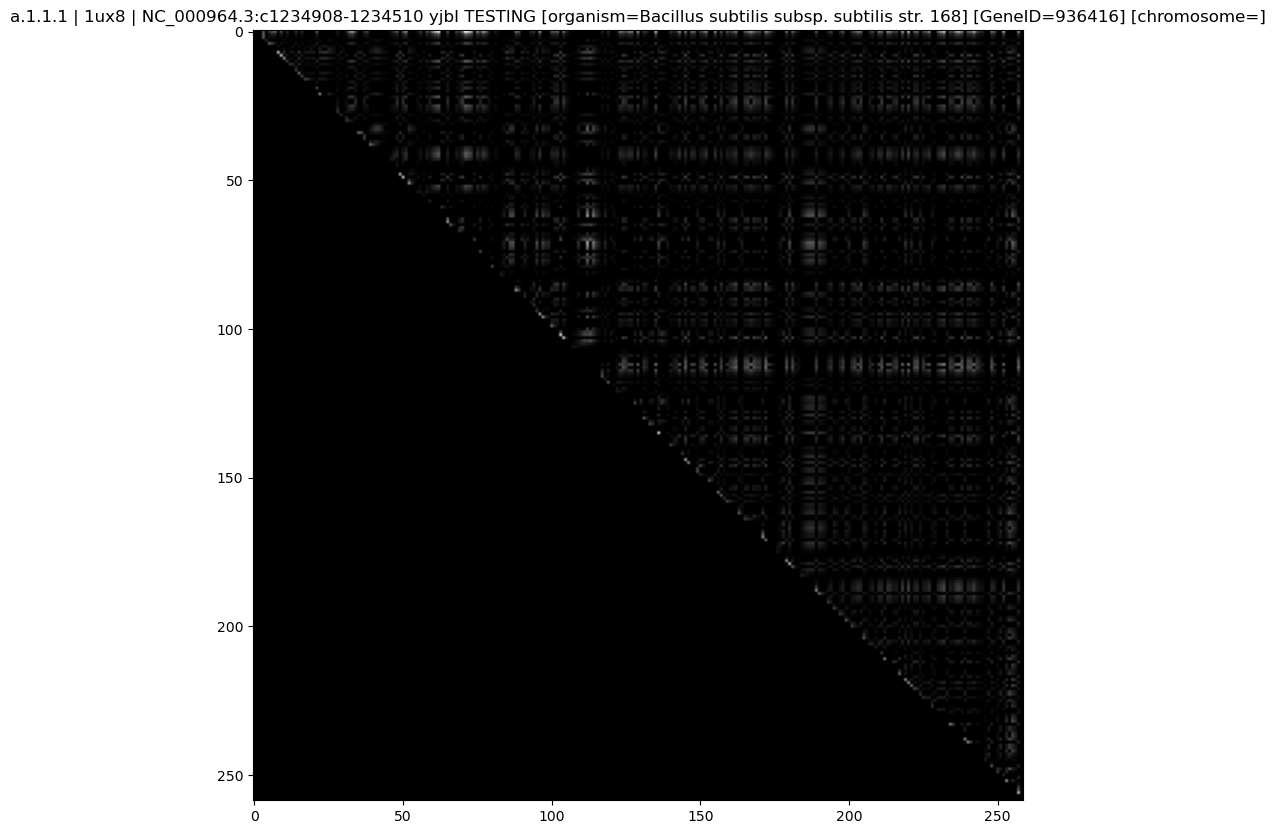

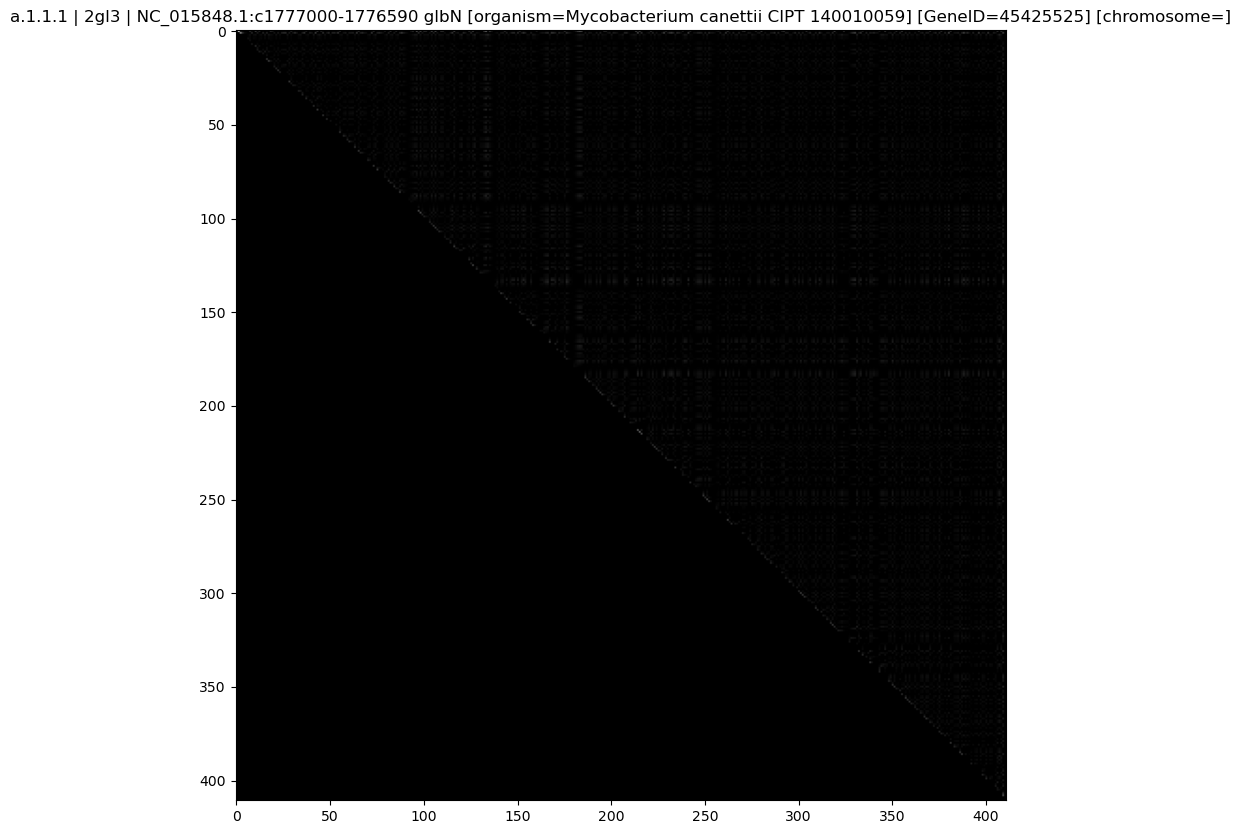

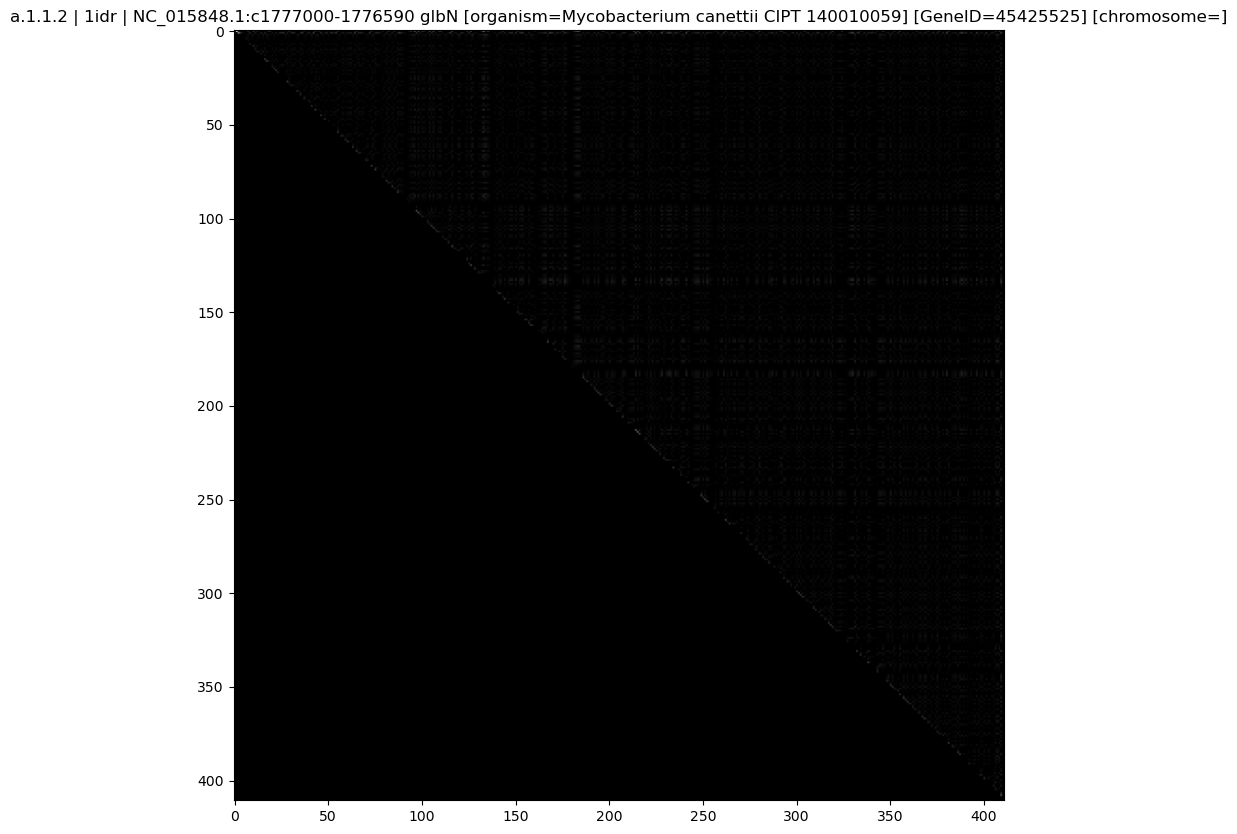

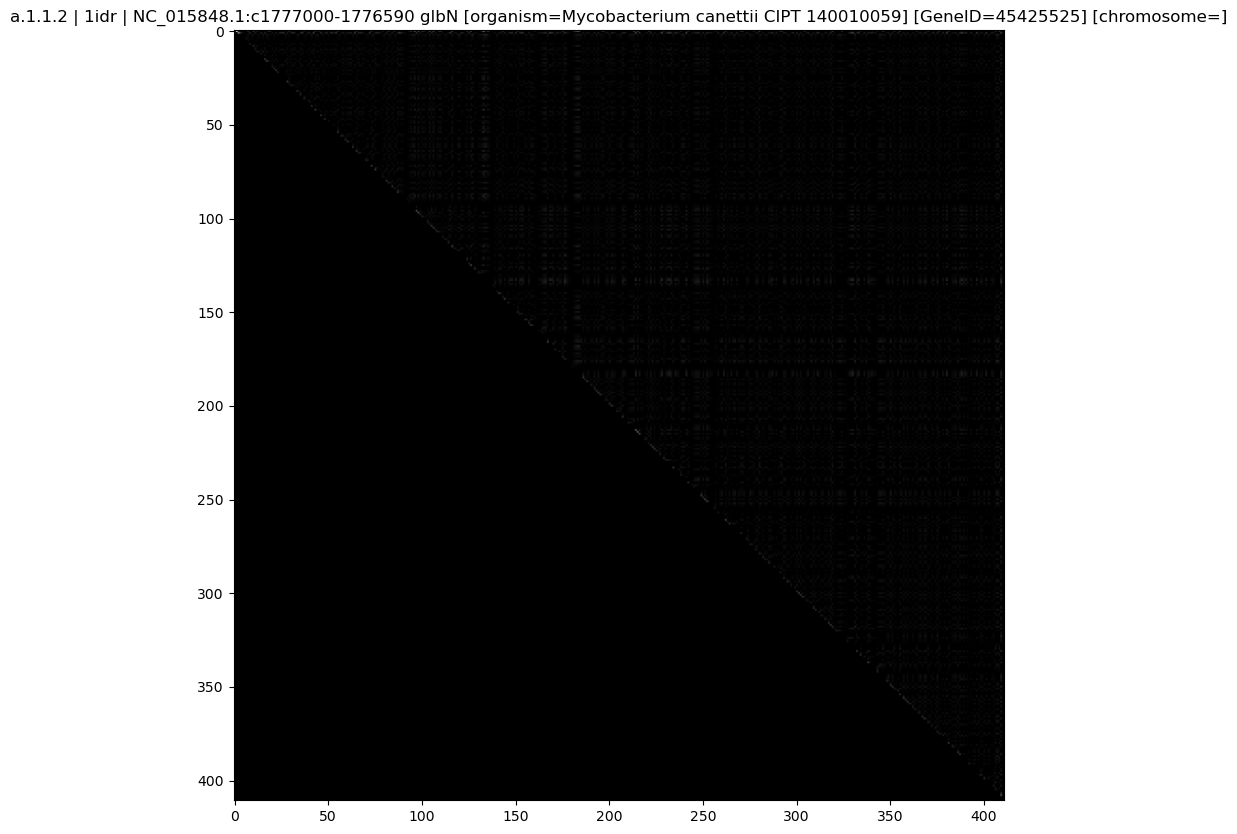

In [3]:
for sf in structure_files:
    with open(sf) as f:
        data = json.load(f)
    plt.figure(figsize=(10, 10))
    structure = np.array(data["structure"])[1]
    plt.imshow(structure, cmap="gray")
    plt.title(f"{data['category']} | {data['pdb_id']} | {data['description']}")
    plt.show()